# Task 5  Sales Prediction 

In [1]:
import numpy as np
import pandas as pd

# Loading the dataset 

## We are using pandas library to load the dataset from csv file 

In [2]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Box plot of advertising costs 

Text(0.5, 1.0, 'Box Plot of Advertising Costs')

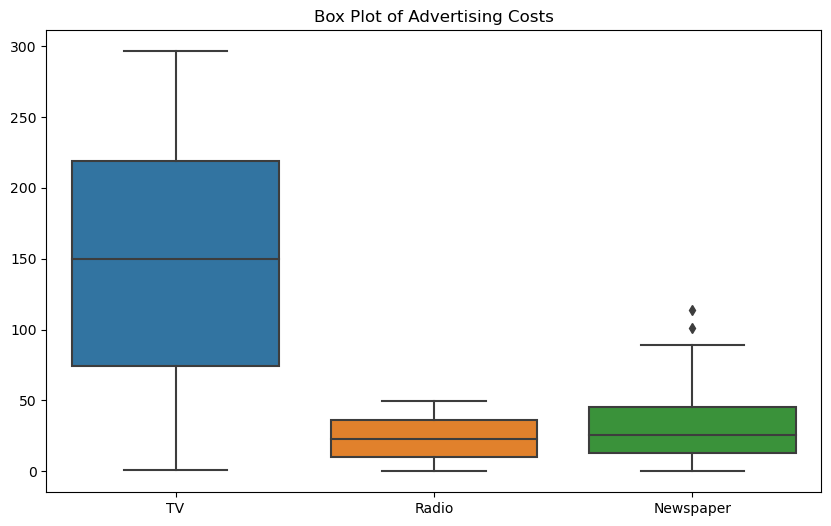

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Box Plot of Advertising Costs')

## Pairplot of tv,radio,newspaper vs sales 

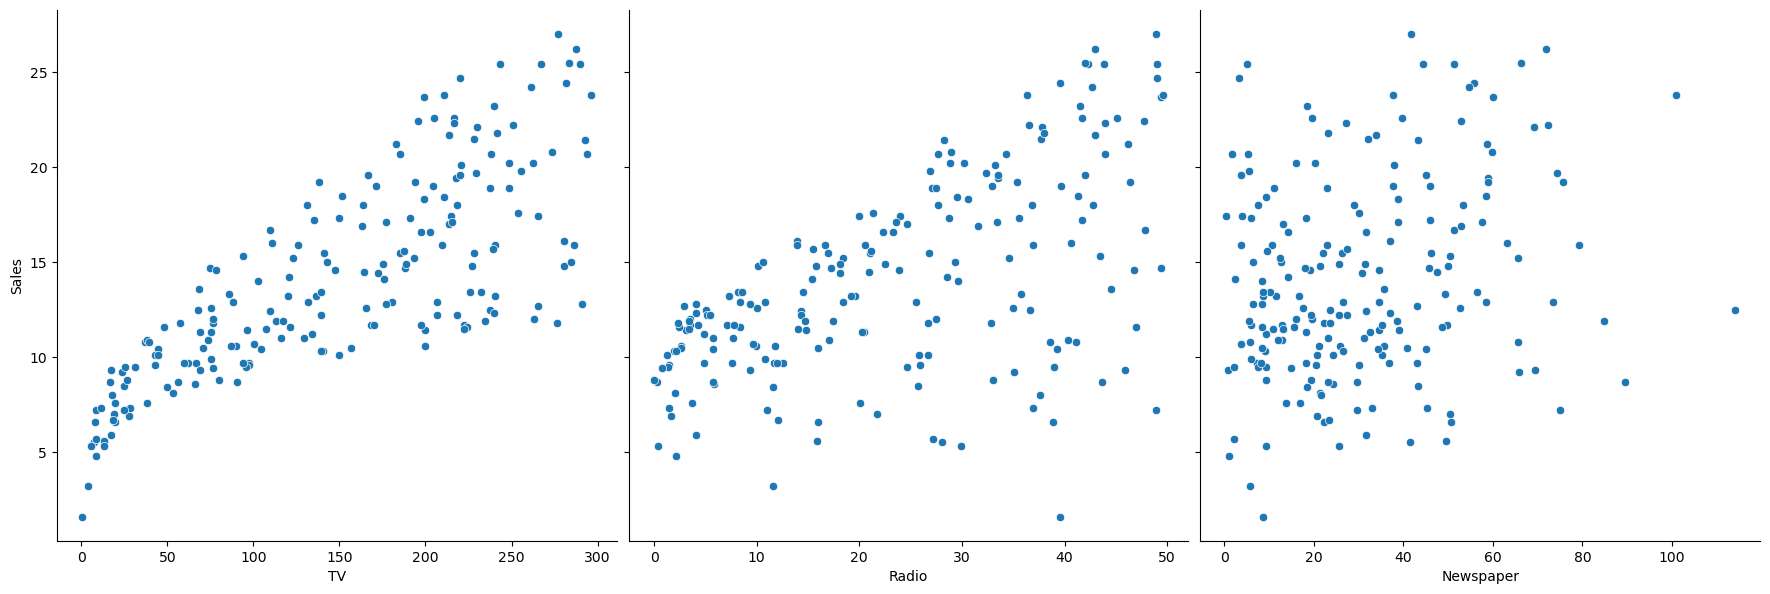

In [5]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=6)

## Linear regression plot of columns advertising vs sales 

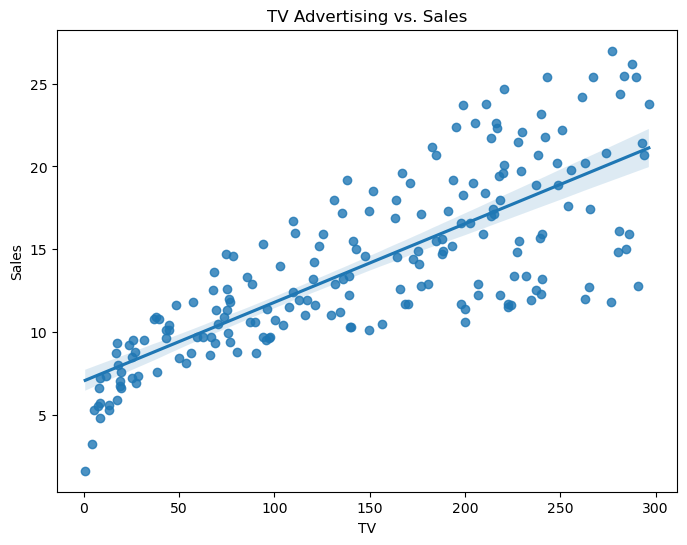

In [6]:
plt.figure(figsize=(8, 6))
sns.regplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs. Sales')
plt.show()

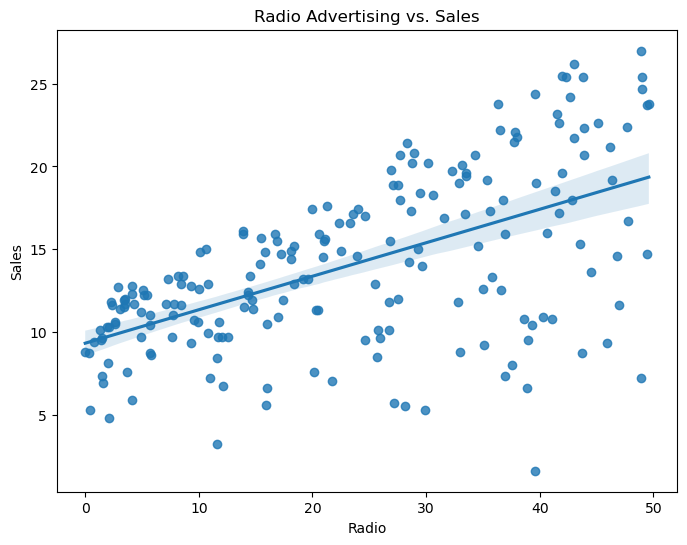

In [7]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs. Sales')
plt.show()

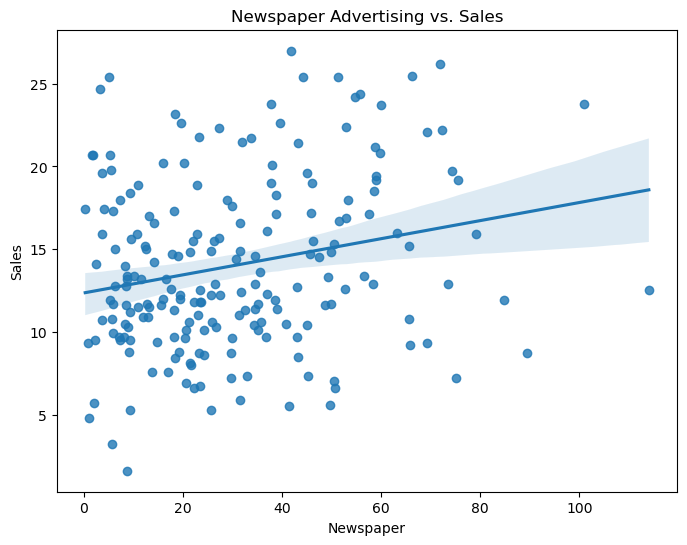

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs. Sales')
plt.show()

# Data Preprocessing 

In [10]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Dropping unnecessary column

In [12]:
df=df.drop(columns='Unnamed: 0')

In [13]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Checking the null values 

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Checking the correlation of columns with sales

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Splitting into dependent and independent variables

In [17]:
x=df.drop(columns='Sales')
y=df['Sales']

In [18]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Splitting the data into train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## Checking the cross validation score with different algorithms 

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [44]:
ridge=cross_val_score(Ridge(), x_test, y_test,cv=8)
np.average(ridge)

0.3635432482953035

In [45]:
linear=cross_val_score(LinearRegression(), x_test, y_test,cv=8)
np.average(linear)

0.36360547468598614

In [46]:
lasso=cross_val_score(Lasso(), x_test, y_test,cv=9)
np.average(lasso)

0.28043103867160313

In [48]:
decision=cross_val_score(DecisionTreeRegressor(), x_test, y_test,cv=8)
np.average(decision)

0.805305117670797

# Training the model

In [33]:
finalmodel=DecisionTreeRegressor()
finalmodel.fit(x_test,y_test)

DecisionTreeRegressor()

## Checking the prediction 

In [65]:
TV=120.2
Radio=19.6
Newspaper=11.6
data=[[TV,Radio,Newspaper]]

prediction=finalmodel.predict(data)
print(prediction[0])

15.6


C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Checking the r2 score and root mean squared error

In [73]:
def scores(y_test,y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("Root_Mean_Squared_error: ", rmse)
    print("R2 Score(Accuracy): {:.2f}%".format(r2 * 100))

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
finalmodel.fit(x_train,y_train)
y_pred2=finalmodel.predict(x_test)
scores(y_test,y_pred2)

Root_Mean_Squared_error:  1.270728137722621
R2 Score(Accuracy): 96.03%


# Got an accuracy of 96%